In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('cleaned_data/customer_data_cleaned.csv')
df.head()

,credit_score,age,balance,estimated_salary,country,gender,tenure
0,619.0,42,93101.008,11348.88,3,1,2
1,68.0,41,8387.860,112542.58,2,1,1
2,52.0,42,15966.800,113931.57,3,1,8
3,699.0,39,38038.282,93826.63,3,1,1
4,85.0,42,12551.820,7984.10,2,1,2


In [4]:
# initialize setup
from pycaret.regression import *
#s = setup(df, target = 'credit_score', transform_target = True, log_experiment = True, experiment_name = 'diamond')
s = setup(df, target = 'credit_score', transform_target = True)


,Description,Value
0,Session id,3464
1,Target,credit_score
2,Target type,Regression
3,Original data shape,"(2020, 7)"
4,Transformed data shape,"(2020, 7)"
5,Transformed train set shape,"(1414, 7)"
6,Transformed test set shape,"(606, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [5]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,186.7616,62753.5828,250.0705,-0.0202,1.0193,2.2843,0.0090
br,Bayesian Ridge,186.7993,62827.7719,250.2229,-0.0215,1.0197,2.2859,0.0080
dummy,Dummy Regressor,186.7795,62847.3156,250.2753,-0.0219,1.0202,2.2883,0.0080
lasso,Lasso Regression,187.3490,62855.1445,250.3127,-0.0226,1.0190,2.2754,0.1820
ridge,Ridge Regression,187.3557,62855.7406,250.3142,-0.0226,1.0190,2.2753,0.0100
lar,Least Angle Regression,187.3584,62855.9254,250.3146,-0.0226,1.0190,2.2753,0.0070
llar,Lasso Least Angle Regression,187.3490,62855.1422,250.3127,-0.0226,1.0190,2.2754,0.0100
lr,Linear Regression,187.3584,62855.9270,250.3146,-0.0226,1.0190,2.2753,0.4300
en,Elastic Net,187.0380,62903.8312,250.4023,-0.0232,1.0197,2.2814,0.0100
ada,AdaBoost Regressor,200.2422,63200.9914,251.1821,-0.0313,1.0047,2.1618,0.0110


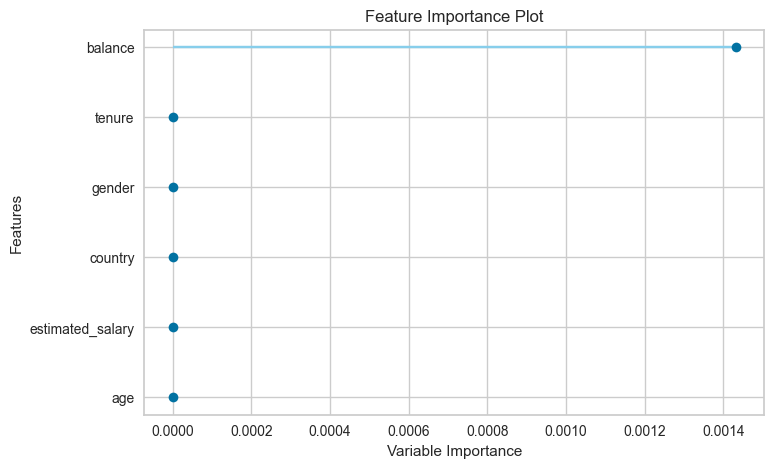

In [6]:
# check feature importance
plot_model(best, plot = 'feature')